In [1]:
pip install scipy xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sst
import math
from math import log

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tsa.stattools import adfuller
from patsy import PatsyError

from statsmodels.formula.api import ols
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.graphics import tsaplots

In [3]:
VNdata = pd.read_excel('/Users/jennifer/Desktop/data.xlsx')
VNdata

,freq,gdpc1,gdpgr,cpi
0,1995,20736.164459,9.540480,40.165720
1,1996,24657.470575,9.340017,42.445125
2,1997,26843.700442,8.152084,43.807412
3,1998,27209.602050,5.764455,46.990546
4,1999,28683.659007,4.773587,48.925195
5,2000,31172.518403,6.787316,48.088409
6,2001,32685.198735,6.192893,47.880886
7,2002,35064.105501,6.320821,49.715120
8,2003,39552.513316,6.899063,51.323230
9,2004,45427.854693,7.536411,55.303319


In [4]:
VNdata.describe()

,freq,gdpc1,gdpgr,cpi
count,26.000000,26.000000,26.000000,26.000000
mean,2007.500000,110919.441737,6.539975,92.834047
std,7.648529,84147.779899,1.347629,46.707359
min,1995.000000,20736.164459,2.905836,40.165720
25%,2001.250000,33279.925427,5.819255,49.122676
50%,2007.500000,88272.364816,6.551264,77.750148
75%,2013.750000,182458.995971,7.061200,142.234450
max,2020.000000,271158.442059,9.540480,168.783721


In [5]:
VNdata['l1_cpi'] = VNdata['cpi'].shift(1)
VNdata['Infl']=100*(np.log(VNdata['cpi'])-np.log(VNdata['l1_cpi']))
VNdata

,freq,gdpc1,gdpgr,cpi,l1_cpi,Infl
0,1995,20736.164459,9.540480,40.165720,NaN,NaN
1,1996,24657.470575,9.340017,42.445125,40.165720,5.519816
2,1997,26843.700442,8.152084,43.807412,42.445125,3.159097
3,1998,27209.602050,5.764455,46.990546,43.807412,7.014339
4,1999,28683.659007,4.773587,48.925195,46.990546,4.034606
5,2000,31172.518403,6.787316,48.088409,48.925195,-1.725132
6,2001,32685.198735,6.192893,47.880886,48.088409,-0.432478
7,2002,35064.105501,6.320821,49.715120,47.880886,3.759274
8,2003,39552.513316,6.899063,51.323230,49.715120,3.183435
9,2004,45427.854693,7.536411,55.303319,51.323230,7.468946


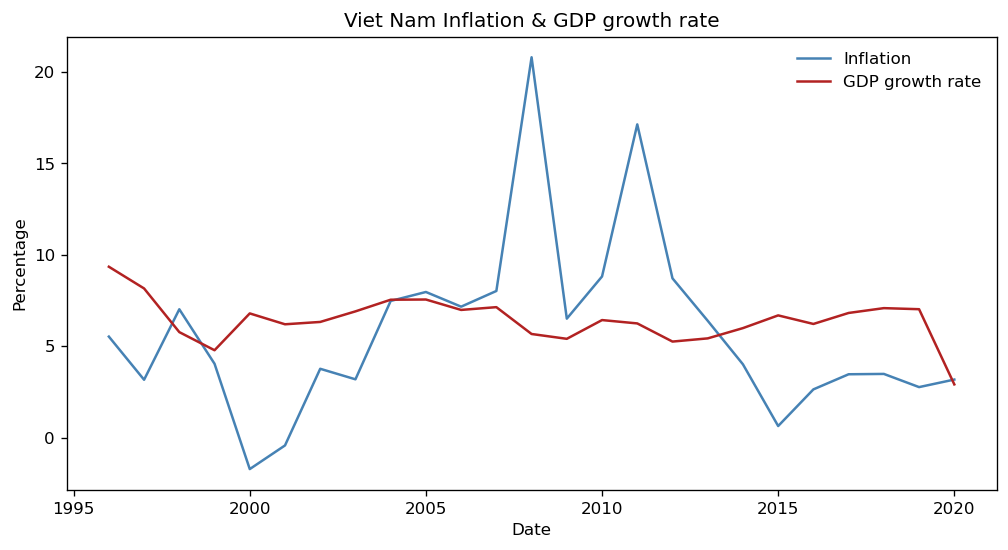

In [6]:
def plot_df(VNdata, x1, y1, x2, y2, title="Viet Nam Inflation & GDP growth rate", xlabel='Date', ylabel='Percentage', dpi=120):
    plt.figure(figsize=(10,5), dpi=dpi)
    plt.plot(x1, y1, color='steelblue', label='Inflation')
    plt.plot(x2, y2, color='firebrick', label='GDP growth rate')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(frameon=False)
    plt.show()
     
plot_df(VNdata, x1=VNdata.freq[1:26], y1=VNdata.Infl[1:26],x2=VNdata.freq[1:26], y2=VNdata.gdpgr[1:26], title='Viet Nam Inflation & GDP growth rate')

In [7]:
VNdata['dinfl'] = VNdata['Infl']- VNdata['Infl'].shift(1)
VNdata

,freq,gdpc1,gdpgr,cpi,l1_cpi,Infl,dinfl
0,1995,20736.164459,9.540480,40.165720,NaN,NaN,NaN
1,1996,24657.470575,9.340017,42.445125,40.165720,5.519816,NaN
2,1997,26843.700442,8.152084,43.807412,42.445125,3.159097,-2.360719
3,1998,27209.602050,5.764455,46.990546,43.807412,7.014339,3.855242
4,1999,28683.659007,4.773587,48.925195,46.990546,4.034606,-2.979733
5,2000,31172.518403,6.787316,48.088409,48.925195,-1.725132,-5.759739
6,2001,32685.198735,6.192893,47.880886,48.088409,-0.432478,1.292654
7,2002,35064.105501,6.320821,49.715120,47.880886,3.759274,4.191752
8,2003,39552.513316,6.899063,51.323230,49.715120,3.183435,-0.575839
9,2004,45427.854693,7.536411,55.303319,51.323230,7.468946,4.285511


In [8]:
sm.tsa.acf(VNdata['dinfl'][2:26], nlags=4)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.36907109, -0.24973699,  0.40906186, -0.12948572])

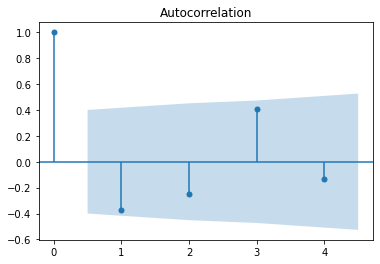

In [9]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(VNdata['dinfl'][2:26], lags=4)
plt.show()

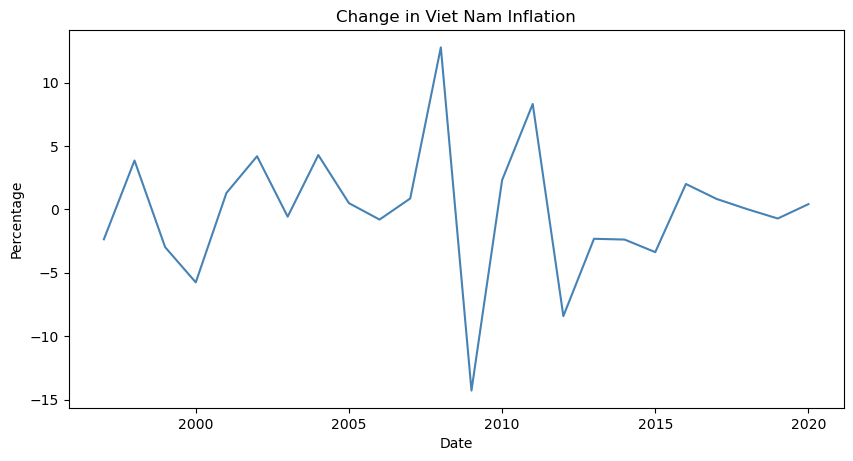

In [10]:
def plot_df(VNdata, x, y, title="Change in Viet Nam Inflation", xlabel='Date', ylabel='Percentage', dpi=100):
    plt.figure(figsize=(10,5), dpi=dpi)
    plt.plot(x, y, color='steelblue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
     
plot_df(VNdata, x=VNdata.freq[2:26], y=VNdata.dinfl[2:26], title='Change in Viet Nam Inflation')

In [11]:
VNdata['d1infl'] = VNdata['dinfl'].shift(1)

In [12]:
lm1=smf.ols(formula='dinfl~d1infl',data=VNdata[1:26])
results1 = lm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.344
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0817
Time:                        07:37:27   Log-Likelihood:                -69.137
No. Observations:                  23   AIC:                             142.3
Df Residuals:                      21   BIC:                             144.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0439      1.067     -0.041      0.968      -2.263       2.175
d1infl        -0.3691      0.202     -1.829      0.082      -0.789       0.051
==============================================================================
Omnibus:                        3.947   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.109
Skew:                           0.612   Prob(JB):                        0.348
Kurtosis:                       3.840   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
VNdata['d2infl'] = VNdata['d1infl'].shift(1)

In [14]:
lm2=smf.ols(formula='dinfl~d1infl+d2infl',data=VNdata[1:26])
results2 = lm2.fit() 
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.189
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0311
Time:                        07:37:27   Log-Likelihood:                -63.956
No. Observations:                  22   AIC:                             133.9
Df Residuals:                      19   BIC:                             137.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2254      1.016     -0.222      0.827      -2.352       1.902
d1infl        -0.5226      0.203     -2.571      0.019      -0.948      -0.097
d2infl        -0.4428      0.202     -2.187      0.041      -0.867      -0.019
==============================================================================
Omnibus:                        6.416   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.209
Skew:                           0.774   Prob(JB):                        0.122
Kurtosis:                       4.481   Cond. No.                         6.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
def calculate_bic(T, ssr, num_params):
 bic =log(ssr/T) + num_params * log(T)/T
 return bic

In [16]:
VNdata['d3infl'] = VNdata['d2infl'].shift(1)
VNdata['d4infl'] = VNdata['d3infl'].shift(1)
VNdata['d5infl'] = VNdata['d4infl'].shift(1)
VNdata['d6infl'] = VNdata['d5infl'].shift(1)
VNdata['d7infl'] = VNdata['d6infl'].shift(1)
VNdata['d8infl'] = VNdata['d7infl'].shift(1)

In [17]:
lm_1=smf.ols(formula='dinfl~d1infl',data=VNdata[2:26])
results_1 = lm_1.fit()
ssr_1=results_1.ssr
num_params_1 = len(results_1.params)
num_params_1
N_1=len(results_1.fittedvalues)

lm_2=smf.ols(formula='dinfl~d1infl+d2infl',data=VNdata[2:26])
results_2 = lm_2.fit()
ssr_2=results_2.ssr
num_params_2 = len(results_2.params)
N_2=len(results_2.fittedvalues)

lm_3=smf.ols(formula='dinfl~d1infl+d2infl+d3infl',data=VNdata[2:26])
results_3 = lm_3.fit()
ssr_3=results_3.ssr
num_params_3= len(results_3.params)
N_3=len(results_3.fittedvalues)

lm_4=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl',data=VNdata[2:26])
results_4 = lm_4.fit()
ssr_4=results_4.ssr
num_params_4 = len(results_4.params)
N_4=len(results_4.fittedvalues)

lm_5=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl',data=VNdata[2:26])
results_5 = lm_5.fit()
ssr_5=results_5.ssr
num_params_5 = len(results_5.params)
N_5=len(results_5.fittedvalues)

lm_6=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl',data=VNdata[2:26])
results_6 = lm_6.fit()
ssr_6=results_6.ssr
num_params_6 = len(results_6.params)
N_6=len(results_6.fittedvalues)

lm_7=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl',data=VNdata[2:26])
results_7 = lm_7.fit()
ssr_7=results_7.ssr
num_params_7 = len(results_7.params)
N_7=len(results_7.fittedvalues)

lm_8=smf.ols(formula='dinfl~d1infl+d2infl+d3infl+d4infl+d5infl+d6infl+d7infl+d8infl',data=VNdata[2:26])
results_8 = lm_8.fit()
ssr_8=results_8.ssr
num_params_8 = len(results_8.params)
N_8=len(results_8.fittedvalues)

In [18]:
bic1 = calculate_bic(N_1, ssr_1, num_params_1)
bic2 = calculate_bic(N_2, ssr_2, num_params_2)
bic3 = calculate_bic(N_3, ssr_3, num_params_3)
bic4 = calculate_bic(N_4, ssr_4, num_params_4)
bic5 = calculate_bic(N_5, ssr_5, num_params_5)
bic6 = calculate_bic(N_6, ssr_6, num_params_6)
bic7 = calculate_bic(N_7, ssr_7, num_params_7)
bic8 = calculate_bic(N_8, ssr_8, num_params_8)
print('BIC: %.3f' % bic1, '%.3f' % bic2,'%.3f' % bic3,'%.3f' % bic4,'%.3f' % bic5,'%.3f' % bic6,'%.3f' % bic7,'%.3f' % bic8)

BIC: 3.447 3.398 3.564 3.707 3.910 4.132 4.351 4.380


In [19]:
def calculate_aic(T, ssr, num_params):
 aic =log(ssr/T) + num_params * 2/T
 return aic

In [20]:
aic1 = calculate_aic(N_1, ssr_1, num_params_1)
aic2 = calculate_aic(N_2, ssr_2, num_params_2)
aic3 = calculate_aic(N_3, ssr_3, num_params_3)
aic4 = calculate_aic(N_4, ssr_4, num_params_4)
aic5 = calculate_aic(N_5, ssr_5, num_params_5)
aic6 = calculate_aic(N_6, ssr_6, num_params_6)
aic7 = calculate_aic(N_7, ssr_7, num_params_7)
aic8 = calculate_aic(N_8, ssr_8, num_params_8)
print('AIC: %.3f' % aic1, '%.3f' % aic2,'%.3f' % aic3,'%.3f' % aic4,'%.3f' % aic5,'%.3f' % aic6,'%.3f' % aic7,'%.3f' % aic8)

AIC: 3.348 3.249 3.366 3.458 3.612 3.786 3.959 3.946


In [21]:
lm_2=smf.ols(formula='dinfl~d1infl+d2infl',data=VNdata[2:26])
results_2 = lm_2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.189
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0311
Time:                        07:37:27   Log-Likelihood:                -63.956
No. Observations:                  22   AIC:                             133.9
Df Residuals:                      19   BIC:                             137.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2254      1.016     -0.222      0.827      -2.352       1.902
d1infl        -0.5226      0.203     -2.571      0.019      -0.948      -0.097
d2infl        -0.4428      0.202     -2.187      0.041      -0.867      -0.019
==============================================================================
Omnibus:                        6.416   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.209
Skew:                           0.774   Prob(JB):                        0.122
Kurtosis:                       4.481   Cond. No.                         6.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
DeltInfl2021=results2.params[0]+results2.params[1]*VNdata.dinfl[25]+results2.params[2]*VNdata.dinfl[24]
DeltInfl2021
print(f'The predicted change in inflation is {DeltInfl2021:.2f}')

The predicted change in inflation is -0.12


In [23]:
Infl2021=DeltInfl2021+VNdata.Infl[25]
Infl2021
print(f'The predicted level of inflation is {Infl2021:.2f}')

The predicted level of inflation is 3.05


In [24]:
VNdata['l1infl'] = VNdata['Infl'].shift(1)
lm_ADF=smf.ols(formula='dinfl~l1infl+d1infl+d2infl',data=VNdata[2:26])
results_ADF = lm_ADF.fit()
results_ADF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dinfl   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.353
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0420
Time:                        07:37:27   Log-Likelihood:                -63.090
No. Observations:                  22   AIC:                             134.2
Df Residuals:                      18   BIC:                             138.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7052      1.881      0.907      0.377      -2.247       5.657
l1infl        -0.3200      0.264     -1.214      0.241      -0.874       0.234
d1infl        -0.3178      0.262     -1.211      0.241      -0.869       0.233
d2infl        -0.3237      0.223     -1.453      0.163      -0.792       0.144
==============================================================================
Omnibus:                       12.586   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.723
Skew:                           1.262   Prob(JB):                      0.00285
Kurtosis:                       5.534   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
result = adfuller(VNdata['Infl'][2:26], autolag='AIC')
result

(-2.8770916066727863,
 0.048077521221073526,
 0,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 89.67735475948803)

In [26]:
VNdata

,freq,gdpc1,gdpgr,cpi,l1_cpi,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl
0,1995,20736.164459,9.540480,40.165720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,24657.470575,9.340017,42.445125,40.165720,5.519816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,26843.700442,8.152084,43.807412,42.445125,3.159097,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.519816
3,1998,27209.602050,5.764455,46.990546,43.807412,7.014339,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.159097
4,1999,28683.659007,4.773587,48.925195,46.990546,4.034606,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,7.014339
5,2000,31172.518403,6.787316,48.088409,48.925195,-1.725132,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,4.034606
6,2001,32685.198735,6.192893,47.880886,48.088409,-0.432478,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,-1.725132
7,2002,35064.105501,6.320821,49.715120,47.880886,3.759274,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,-0.432478
8,2003,39552.513316,6.899063,51.323230,49.715120,3.183435,-0.575839,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,3.759274
9,2004,45427.854693,7.536411,55.303319,51.323230,7.468946,4.285511,-0.575839,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,3.183435


In [27]:
VNdata['l1_gdpc1'] = VNdata['gdpc1'].shift(1)
VNdata['gdpgr']=100*(np.log(VNdata['gdpc1'])-np.log(VNdata['l1_gdpc1']))
VNdata

,freq,gdpc1,gdpgr,cpi,l1_cpi,Infl,dinfl,d1infl,d2infl,d3infl,d4infl,d5infl,d6infl,d7infl,d8infl,l1infl,l1_gdpc1
0,1995,20736.164459,NaN,40.165720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,24657.470575,17.320067,42.445125,40.165720,5.519816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20736.164459
2,1997,26843.700442,8.495125,43.807412,42.445125,3.159097,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.519816,24657.470575
3,1998,27209.602050,1.353875,46.990546,43.807412,7.014339,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.159097,26843.700442
4,1999,28683.659007,5.275766,48.925195,46.990546,4.034606,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,NaN,7.014339,27209.602050
5,2000,31172.518403,8.320930,48.088409,48.925195,-1.725132,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,NaN,4.034606,28683.659007
6,2001,32685.198735,4.738545,47.880886,48.088409,-0.432478,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,NaN,-1.725132,31172.518403
7,2002,35064.105501,7.025563,49.715120,47.880886,3.759274,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,NaN,-0.432478,32685.198735
8,2003,39552.513316,12.045127,51.323230,49.715120,3.183435,-0.575839,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,NaN,3.759274,35064.105501
9,2004,45427.854693,13.849622,55.303319,51.323230,7.468946,4.285511,-0.575839,4.191752,1.292654,-5.759739,-2.979733,3.855242,-2.360719,NaN,3.183435,39552.513316


In [28]:
from arch.univariate import ARX
ar = ARX(VNdata['gdpgr'][1:26], lags=2)
ar.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                  gdpgr   R-squared:                       0.196
Mean Model:                        AR   Adj. R-squared:                  0.115
Vol Model:          Constant Variance   Log-Likelihood:               -70.6932
Distribution:                  Normal   AIC:                           149.386
Method:            Maximum Likelihood   BIC:                           153.928
                                        No. Observations:                   23
Date:                Sun, Dec 12 2021   Df Residuals:                       20
Time:                        07:37:27   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          5.6435      2.010      2.807  4.994e-03   [  1.704,  9.583]
gdpgr[1]       0.4688      0.237      1.982  4.753e-02 [5.107e-03,  0.932]
gdpgr[2]      -0.0377      0.132     -0.286      0.775   [ -0.296,  0.221]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
sigma2        27.3676      9.219      2.968  2.993e-03 [  9.298, 45.437]
========================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [29]:
from arch.univariate import ARCH, GARCH
ar.volatility = GARCH(p=1,q=1)
ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                  gdpgr   R-squared:                       0.071
Mean Model:                        AR   Adj. R-squared:                 -0.022
Vol Model:                       ARCH   Log-Likelihood:               -69.7977
Distribution:                  Normal   AIC:                           149.595
Method:            Maximum Likelihood   BIC:                           155.273
                                        No. Observations:                   23
Date:                Sun, Dec 12 2021   Df Residuals:                       20
Time:                        07:37:28   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          3.1830      3.021      1.054      0.292   [ -2.738,  9.104]
gdpgr[1]       0.7086      0.174      4.080  4.508e-05   [  0.368,  1.049]
gdpgr[2]      -0.1878      0.113     -1.664  9.605e-02 [ -0.409,3.336e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          7.3866     18.642      0.396      0.692 [-29.151, 43.924]
alpha[1]       1.0000      1.215      0.823      0.410 [ -1.380,  3.380]
========================================================================

Covariance estimator: robust
"""

In [30]:
Coef=res.params
Coef

Const       3.183009
gdpgr[1]    0.708642
gdpgr[2]   -0.187784
omega       7.386587
alpha[1]    1.000000
Name: params, dtype: float64

In [31]:
dev_mean_gdpgr=VNdata['gdpgr'][1:26]-Coef[0]

In [32]:
upper_bound=Coef[0]+res.conditional_volatility
lower_bound=Coef[0]-res.conditional_volatility

Text(0, 0.5, 'Percent')

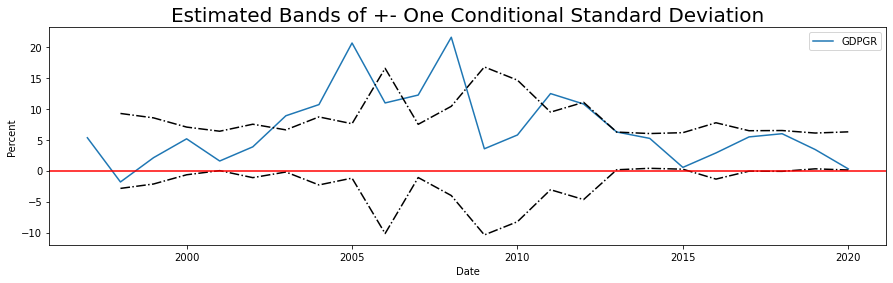

In [33]:
plt.figure(figsize=(15,4))
plt.plot(VNdata['freq'][2:26],dev_mean_gdpgr[1:26])
plt.plot(VNdata['freq'][2:26],upper_bound[1:26],color='black', linestyle='-.')
plt.plot(VNdata['freq'][2:26],lower_bound[1:26],color='black', linestyle='-.')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Estimated Bands of +- One Conditional Standard Deviation',fontsize=20)
plt.legend(['GDPGR'],fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Percent",fontsize=10)

In [34]:
#####